In [9]:
# import your standard packages
%run ../../global-tools/start.py

# import your local functions
sys.path.insert(1, '../local-tools/')
from local_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

Default libraries loaded.


In [10]:
# WOA Raw
path_WOA = '../data/WOA/'
infn_WOA = 'woa_processed.nc'

ds_WOA = xr.open_dataset(path_WOA + infn_WOA)

# WOA CP
path_CD = '../data/CD/'
infn_CD = 'cd_woa.nc'

ds_CD= xr.open_dataset(path_CD + infn_CD)
# ds_CD

In [11]:
# get data from tigress
path = '../data/SLA/'
# infn = 'all_adt_sla_global_twosat_phy_l4_vDT2018_daily_1994_2018_processed.nc'
infn = 'sla_25km_processed.nc'

ds_SLA = xr.open_dataset(path + infn)
# ds_SLA

In [12]:
xx,yy = np.meshgrid(np.array(ds_WOA.lon),np.array(ds_WOA.lat))

mask = mask_coast(xx.flatten(),yy.flatten(),[35,120,-20,30])
mask.shape

(5700,)

In [13]:
var = ds_CD.doxy_50_200_mean
var_anom = ds_CD.doxy_50_200_mean_anom
ann_mean = ds_CD.doxy_ann_mean_50_200

#######################################################
# get seasonal anomaly
# 0 = MAM, 1 = JJA, 2 = SON, 3 = DJF
seasonal_anom = np.full([2,len(ds_CD.lat),len(ds_CD.lon)],np.nan)
seasonal_mean = np.full([2,len(ds_CD.lat),len(ds_CD.lon)],np.nan)
seasonal_OCP = np.full([2,len(ds_CD.lat),len(ds_CD.lon)],np.nan)
seasonal_TCP = np.full([2,len(ds_CD.lat),len(ds_CD.lon)],np.nan)
seasonal_TCP_20 = np.full([2,len(ds_CD.lat),len(ds_CD.lon)],np.nan)
for ss in range(2):
    if ss == 0:
        ind = [5,6,7,8,9,10] # Summer/Fall - -1 for index
        seasonal_mean[ss,:,:] = np.nanmean(var[ind,:,:],0)
        seasonal_anom[ss,:,:] = np.nanmean(var_anom[ind,:,:],0)
        seasonal_OCP[ss,:,:] = np.nanmean(ds_CD.OCP[ind,:,:],0)
        seasonal_TCP[ss,:,:] = np.nanmean(ds_CD.TCP[ind,:,:],0)
        seasonal_TCP_20[ss,:,:] = np.nanmean(ds_CD.TCP_thresh_20[ind,:,:],0)
        
    elif ss == 1:
        ind = [0,1,2,3,4,11] # Winter/Spring
        seasonal_mean[ss,:,:] = np.nanmean(var[ind,:,:],0)
        seasonal_anom[ss,:,:] = np.nanmean(var_anom[ind,:,:],0)
        seasonal_OCP[ss,:,:] = np.nanmean(ds_CD.OCP[ind,:,:],0)
        seasonal_TCP[ss,:,:] = np.nanmean(ds_CD.TCP[ind,:,:],0)
        seasonal_TCP_20[ss,:,:] = np.nanmean(ds_CD.TCP_thresh_20[ind,:,:],0)
        

#______________________________________________________
# month of lowest oxygen, value of lowest oxygen in shelf waters
#______________________________________________________
mons = np.arange(1,13)

min_mean = np.full([len(ds_CD.lat),len(ds_CD.lon)],np.nan)
min_mean_mon = np.full([len(ds_CD.lat),len(ds_CD.lon)],np.nan)
min_mean_seas = np.full([len(ds_CD.lat),len(ds_CD.lon)],np.nan)

for ii,jj in itertools.product(np.arange(len(ds_CD.lat)),np.arange(len(ds_CD.lon))):
    doxy = var[:,ii,jj]
    
    if np.sum(doxy[np.isfinite(doxy)])>0:
        ind = np.nanargmin(doxy)

        min_mean[ii,jj] = doxy[ind]
        min_mean_mon[ii,jj] = mons[ind]
        
        if (mons[ind] >2) & (mons[ind] <6):
            min_mean_seas[ii,jj] = 1
        elif (mons[ind] >5) & (mons[ind] <9):
            min_mean_seas[ii,jj] = 2
        elif (mons[ind] >8) & (mons[ind] <12):
            min_mean_seas[ii,jj] = 3
        else:
            min_mean_seas[ii,jj] = 4
            
        if (mons[ind] >5) & (mons[ind] <12):
            min_mean_seas[ii,jj] = 1
        elif (mons[ind] ==12) | ((mons[ind] >0) & (mons[ind] <6)):
            min_mean_seas[ii,jj] = 2
            
        if len(doxy[doxy == np.nanmin(doxy)])>1:
                print('Duplicate Values in Minimum.')



/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: Mean of empty slice
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launche

In [14]:
# SLA

var_anom = ds_SLA.sla_mon_clim

#######################################################
# get seasonal anomaly
# 0 = MAM, 1 = JJA, 2 = SON, 3 = DJF
seasonal_anom_sla = np.full([2,len(ds_SLA.lat),len(ds_SLA.lon)],np.nan)
for ss in range(2):
    if ss == 0:
        ind = [5,6,7,8,9,10] # Summer/Fall - -1 for index
        seasonal_anom_sla[ss,:,:] = np.nanmean(var_anom[ind,:,:],0)
        
    elif ss == 1:
        ind = [0,1,2,3,4,11] # Winter/Spring
        seasonal_anom_sla[ss,:,:] = np.nanmean(var_anom[ind,:,:],0)

/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice
  if sys.path[0] == '':
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


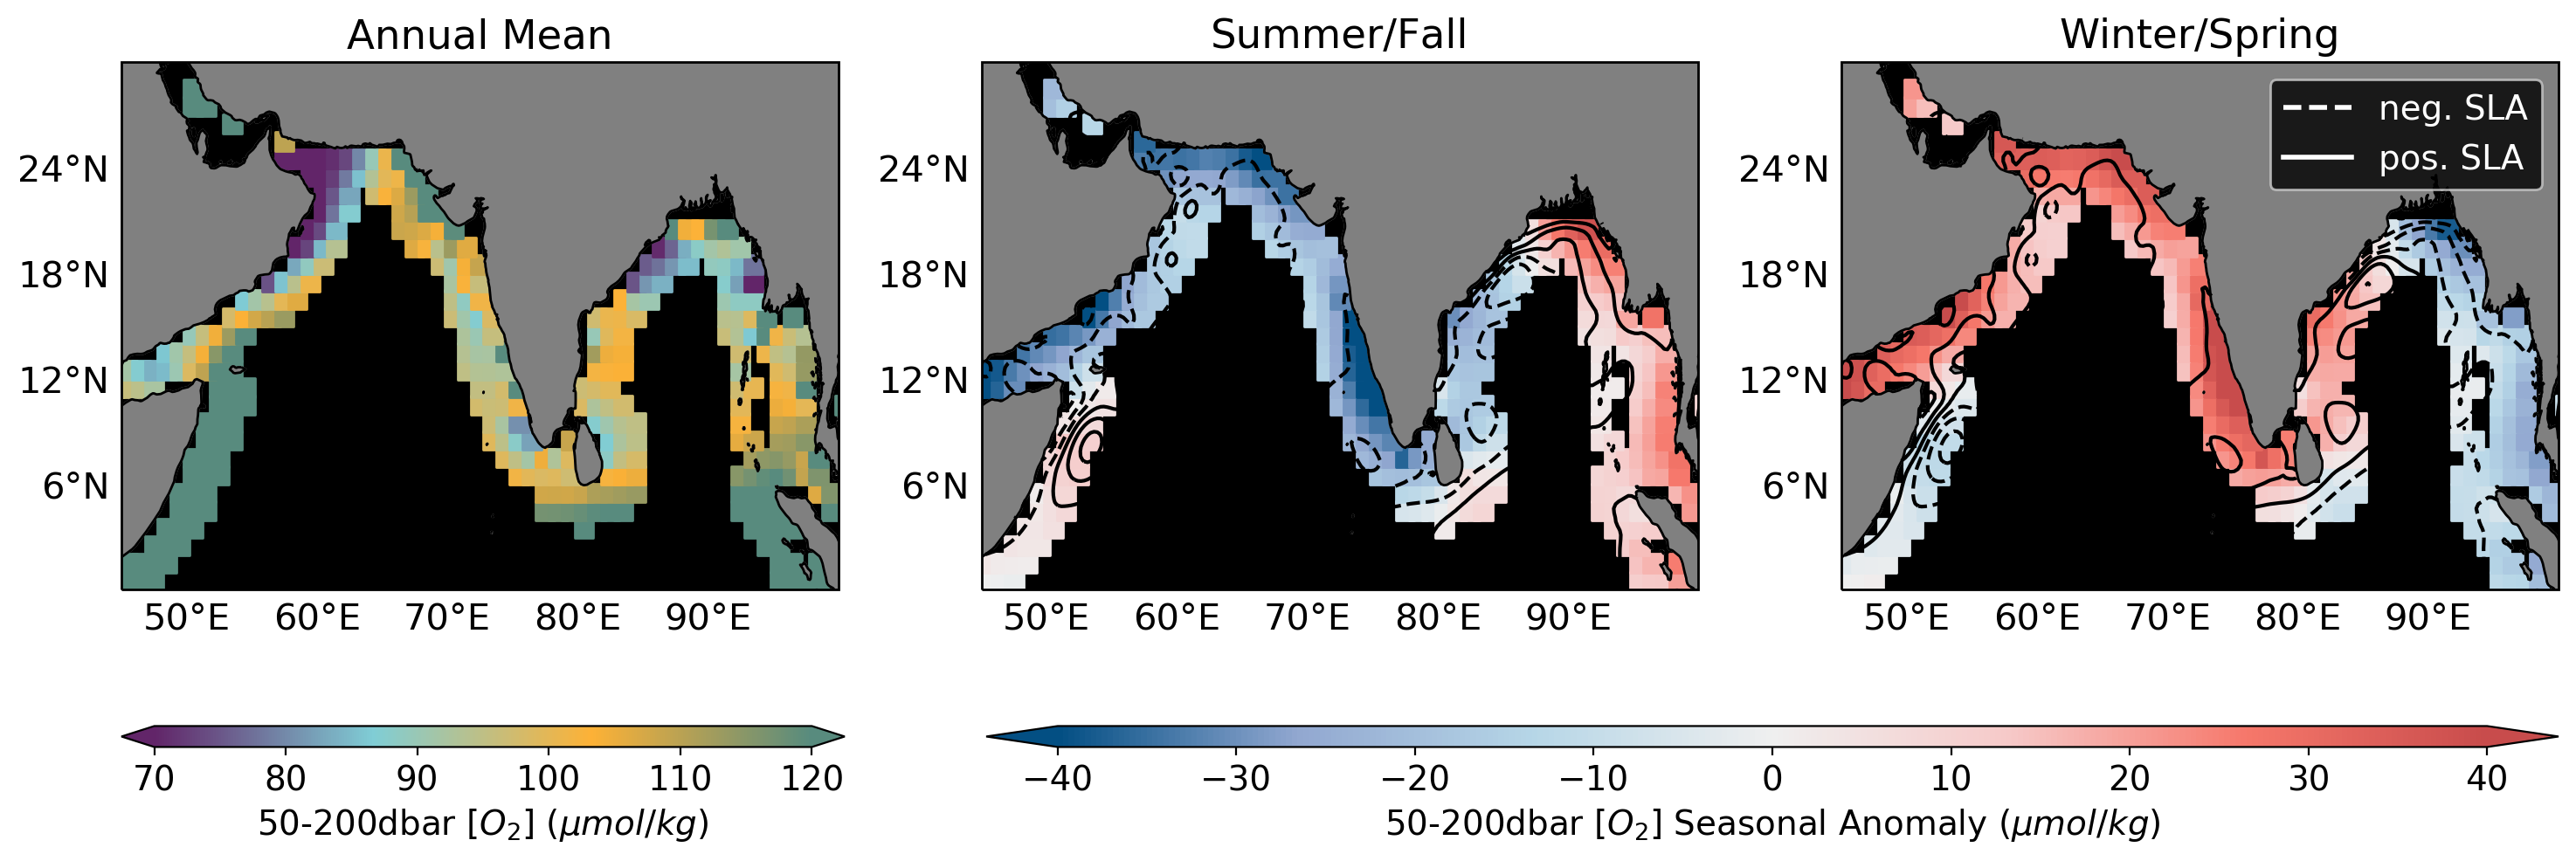

In [34]:
var = seasonal_anom
ann_mean = np.array(ann_mean)

fig = plt.figure(figsize=(18,4),dpi=200)
sz = 60
cmin = 70
cmax = 120

cmin_anom = -40
cmax_anom = 40

# ['#d5f4e6','#80ced6','#fefbd8','#618685']

cmap = get_continuous_cmap(['#622569','#80ced6','#feb236','#588c7e'])
cmap_anom = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])
# cmap_anom = plt.cm.coolwarm
xx,yy = np.meshgrid(ds_CD.lon,ds_CD.lat)
xx = xx.flatten()
yy = yy.flatten()

plt.rcParams.update({'font.size': 14})
season_title = ['Annual Mean', 'Summer/Fall', 'Winter/Spring']

levels = np.linspace(-0.15,0.15,10)

cbounds = [45,100,0,30]

##############################################################

ax = fig.add_subplot(131,projection= ccrs.PlateCarree())
tmp = ann_mean
tmp = tmp.flatten()
pann = ax.scatter(xx[mask],yy[mask],c = tmp[mask],marker='s',s= sz,
                      cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
ax.set_title(season_title[0])
add_land(ax, cbounds)

ax = fig.add_subplot(132,projection= ccrs.PlateCarree())
tmp = var[0,:,:]
tmp = tmp.flatten()
p = ax.scatter(xx[mask],yy[mask],c = tmp[mask],marker='s',s= sz,
                      cmap=cmap_anom,vmin=cmin_anom,vmax=cmax_anom,transform=ccrs.PlateCarree())
c=ax.contour(ds_SLA.lon,ds_SLA.lat,seasonal_anom_sla[0,:,:], colors = 'black',
          levels = levels)
# ax.clabel(c, c.levels, inline=True, fontsize=10)
ax.set_title(season_title[1])
add_land(ax, cbounds)

ax = fig.add_subplot(133,projection= ccrs.PlateCarree())

tmp = var[1,:,:]
tmp = tmp.flatten()
p = ax.scatter(xx[mask],yy[mask],c = tmp[mask],marker='s',s= sz,
                      cmap=cmap_anom,vmin=cmin_anom,vmax=cmax_anom,transform=ccrs.PlateCarree())
c=ax.contour(ds_SLA.lon,ds_SLA.lat,seasonal_anom_sla[1,:,:], colors = 'black',
          levels = levels)
# ax.clabel(c, c.levels, inline=True, fontsize=10)
add_land(ax, cbounds)

ax.set_title(season_title[2])

neg = plt.Line2D((0, 1), (0, 0), color='white', linestyle='--', linewidth=2)
pos = plt.Line2D((0, 1), (0, 0), color='white', linestyle='-', linewidth=2)

l = plt.legend([neg,pos],['neg. SLA', 'pos. SLA'],facecolor = 'k')
plt.setp(l.get_texts(), color='w');

cbar_ax = fig.add_axes([0.4, -0.1, 0.5, 0.03])
cbar_anom = fig.colorbar(p,cax=cbar_ax, pad=0.04, orientation = 'horizontal', extend = 'both')
cbar_anom.set_label('50-200dbar [$O_2$] Seasonal Anomaly ($\mu mol/ kg$)')

cbar_ax = fig.add_axes([0.125, -0.1, 0.23, 0.03])
cbar = fig.colorbar(pann,cax=cbar_ax, pad=0.04, orientation = 'horizontal', extend = 'both')
cbar.set_label('50-200dbar [$O_2$] ($\mu mol/ kg$)')


In [ ]:
var1 = min_mean
var2 = min_mean_seas

fig, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(16,6),dpi=200,subplot_kw={'projection': ccrs.PlateCarree()})
sz = 60

cmin1 = 60
cmax1 = 100

cmin2 = 1
cmax2 = 4

cmap1 = mpl.colors.ListedColormap(['red', 'green', 'blue'])
# cmap.set_over('0.25')
# cmap.set_under('0.75')
cbounds = [45,100,0,30]
cnorm = mpl.colors.BoundaryNorm(cbounds, cmap.N)

# colors = ['royalblue', 'cyan','yellow', 'orange']
colors = ['darkorange','dodgerblue','purple', 'teal']

xx,yy = np.meshgrid(ds_CD.lon,ds_CD.lat)
xx = xx.flatten()
yy = yy.flatten()

plt.rcParams.update({'legend.fontsize': 16,
                     'legend.handlelength': 2,
                     "legend.markerscale":2,
                     'font.size': 12})

title = ['Monthly Minimum','Season of Monthly Minimum']
season_title = ['MAM','JJA','SON','DJF']
##############################################################

ax = axes[0]
tmp = var1.flatten()
p = ax.scatter(xx[mask],yy[mask],c = tmp[mask],marker='s',s= sz,
               cmap=cmap1,vmin=cmin1,vmax=cmax1,transform=ccrs.PlateCarree(),
               norm = cnorm)
ax.set_title(title[0])
add_land(ax, cbounds)

cbar = plt.colorbar(p, ax = ax,orientation='horizontal', norm = cnorm, extend= 'both')
cbar.set_label('Mean 10-200dbar [$O_2$] ($\mu mol/ kg$)')

ax = axes[1]
tmp = var2.flatten()
tmp = tmp[mask]
xx = xx[mask]
yy = yy[mask]
season = np.arange(1,5)
for ss in range(4):
    ind = tmp == (season[ss])

    p = ax.scatter(xx[ind],yy[ind],c = colors[ss],label = season_title[ss],marker='s',s= sz,
                      vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
add_land(ax, cbounds)
ax.set_title(title[1])
# get first axes height

box0 = axes[0].get_position()
box = ax.get_position()
ax.set_position([box.x0, box0.y0, box0.width, box0.height])
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.36),
      ncol=4, fancybox=True, shadow=True)





In [ ]:
# old plots 

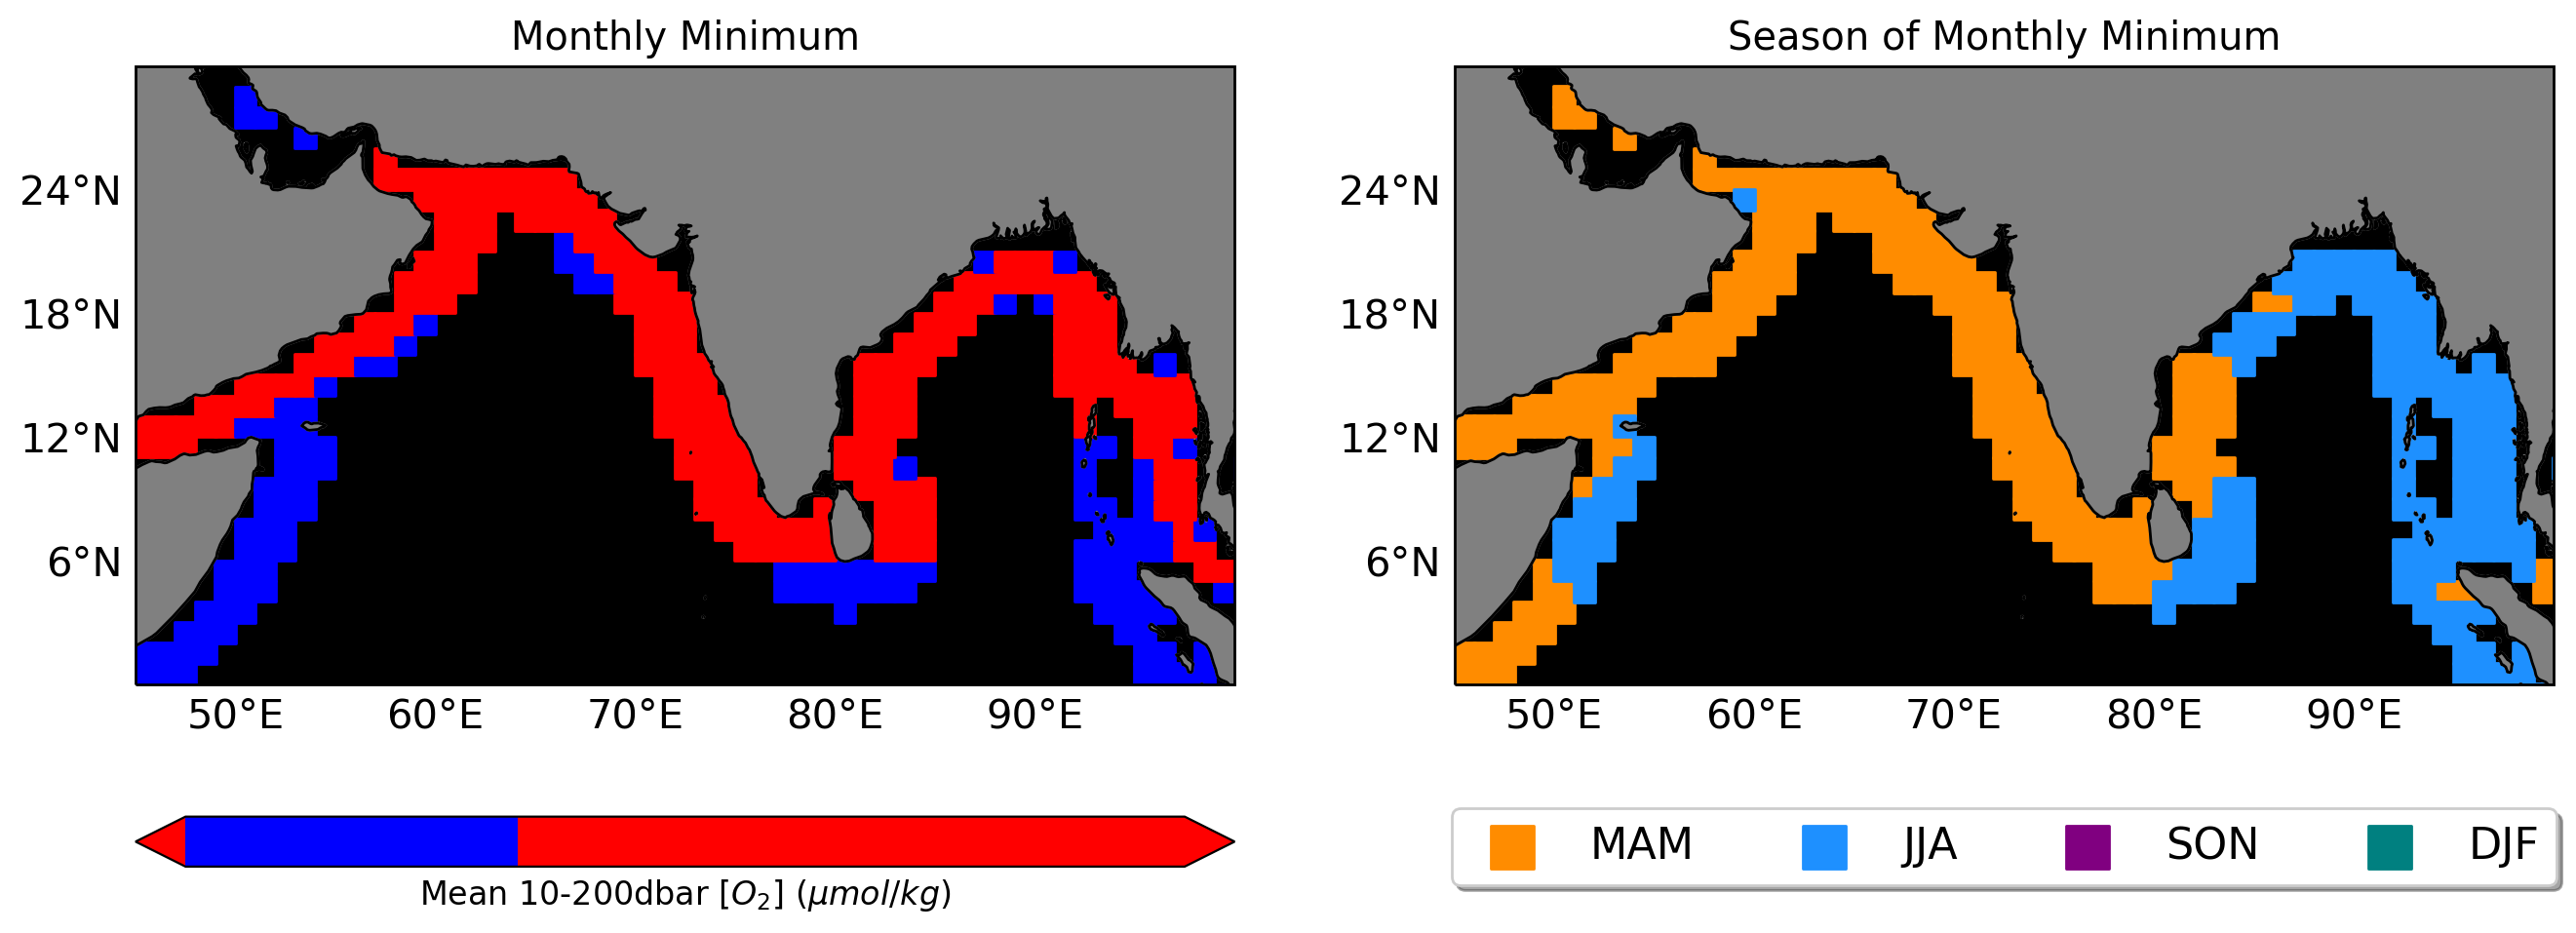

In [37]:
var1 = min_mean
var2 = min_mean_seas

fig, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(16,6),dpi=200,subplot_kw={'projection': ccrs.PlateCarree()})
sz = 60

cmin1 = 60
cmax1 = 100

cmin2 = 1
cmax2 = 4

cmap1 = mpl.colors.ListedColormap(['red', 'green', 'blue'])
# cmap.set_over('0.25')
# cmap.set_under('0.75')
cbounds = [45,100,0,30]
cnorm = mpl.colors.BoundaryNorm(cbounds, cmap.N)

# colors = ['royalblue', 'cyan','yellow', 'orange']
colors = ['darkorange','dodgerblue','purple', 'teal']

xx,yy = np.meshgrid(ds_CD.lon,ds_CD.lat)
xx = xx.flatten()
yy = yy.flatten()

plt.rcParams.update({'legend.fontsize': 16,
                     'legend.handlelength': 2,
                     "legend.markerscale":2,
                     'font.size': 12})

title = ['Monthly Minimum','Season of Monthly Minimum']
season_title = ['MAM','JJA','SON','DJF']
##############################################################

ax = axes[0]
tmp = var1.flatten()
p = ax.scatter(xx[mask],yy[mask],c = tmp[mask],marker='s',s= sz,
               cmap=cmap1,vmin=cmin1,vmax=cmax1,transform=ccrs.PlateCarree(),
               norm = cnorm)
ax.set_title(title[0])
add_land(ax, cbounds)

cbar = plt.colorbar(p, ax = ax,orientation='horizontal', norm = cnorm, extend= 'both')
cbar.set_label('Mean 10-200dbar [$O_2$] ($\mu mol/ kg$)')

ax = axes[1]
tmp = var2.flatten()
tmp = tmp[mask]
xx = xx[mask]
yy = yy[mask]
season = np.arange(1,5)
for ss in range(4):
    ind = tmp == (season[ss])

    p = ax.scatter(xx[ind],yy[ind],c = colors[ss],label = season_title[ss],marker='s',s= sz,
                      vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
add_land(ax, cbounds)
ax.set_title(title[1])
# get first axes height

box0 = axes[0].get_position()
box = ax.get_position()
ax.set_position([box.x0, box0.y0, box0.width, box0.height])
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.36),
      ncol=4, fancybox=True, shadow=True)




In [ ]:
var1 = min_mean

fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize=(10,6),dpi=200,subplot_kw={'projection': ccrs.PlateCarree()})
sz = 200

cmin1 = 0
cmax1 = 100


cmap = mpl.colors.ListedColormap(['red', 'green', 'blue'])
cmap.set_over('0.25')
cmap.set_under('0.75')

xx,yy = np.meshgrid(ds_CD.lon,ds_CD.lat)
xx = xx.flatten()
yy = yy.flatten()

plt.rcParams.update({'legend.fontsize': 16,
                     'legend.handlelength': 2,
                     "legend.markerscale":2,
                     'font.size': 12})

##############################################################
cbounds = [0,10, 60, 100]
norm = mpl.colors.BoundaryNorm(cbounds, cmap.N)
ax = axes
tmp = var1.flatten()
p = ax.scatter(xx[mask],yy[mask],c = tmp[mask],marker='s',s= sz,
                      cmap=cmap,vmin = cmin1, vmax = cmax1,transform=ccrs.PlateCarree(), norm = norm)
ax.set_title(title[0])
add_land(ax)

cbar_ax = fig.add_axes([0.925, 0.125, 0.02, 0.75])
# cb2 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap,
#                                     norm=norm, extend = 'neither')
# cb2 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap,
#                                 norm=norm,
#                                 boundaries=[0] + bounds + [225],
#                                 extend='both',
#                                 ticks=bounds,
#                                 spacing='proportional',
#                                 orientation='vertical')
cb2 = fig.colorbar(p,cbar_ax, norm = norm, extend = 'both')
cb2.set_label('Mean 50-200dbar [$O_2$] ($\mu mol/ kg$)')



In [ ]:
var1 = min_mean_seas

fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize=(10,6),dpi=200,subplot_kw={'projection': ccrs.PlateCarree()})
sz = 200

cmin1 = 0
cmax1 = 100


cmap = mpl.colors.ListedColormap(['red', 'green', 'blue'])
cmap.set_over('0.25')
cmap.set_under('0.75')

xx,yy = np.meshgrid(ds_CD.lon,ds_CD.lat)
xx = xx.flatten()
yy = yy.flatten()

plt.rcParams.update({'legend.fontsize': 16,
                     'legend.handlelength': 2,
                     "legend.markerscale":2,
                     'font.size': 12})

##############################################################
ax = axes
tmp = var2.flatten()
tmp = tmp[mask]
xx = xx[mask]
yy = yy[mask]
season = np.arange(1,5)
for ss in range(4):
    ind = tmp == (season[ss])

    p = ax.scatter(xx[ind],yy[ind],c = colors[ss],label = season_title[ss],marker='s',s= sz,
                      vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
add_land(ax)
ax.set_title(title[1])
ax.legend(loc='center right', bbox_to_anchor=(1.25, .5),borderpad = 1,
      ncol=1, fancybox=True, shadow=True, labelspacing = 3,handletextpad = 0.1)





In [ ]:
# var = seasonal_anom
# ann_mean = np.array(ann_mean)

# coastal = True


# fig = plt.figure(figsize=(14,16),dpi=200)
# gs = fig.add_gridspec(3,2)
# sz = 60
# cmin = -50
# cmax = 50
# cmap = plt.cm.coolwarm
# xx,yy = np.meshgrid(ds_CD.lon,ds_CD.lat)
# xx = xx.flatten()
# yy = yy.flatten()

# plt.rcParams.update({'font.size': 14})
# season_title = ['Summer/Fall', 'Winter/Spring']
# seas_ind_sla = [2,1,3,0] # for sla orgiinal order is DJF,JJA,MAM,SON

# levels = np.linspace(-0.15,0.15,10)

# ##############################################################

# ax = fig.add_subplot(gs[0, :],projection= ccrs.PlateCarree())
# tmp = ann_mean
# tmp = tmp.flatten()
# pann = ax.scatter(xx[mask],yy[mask],c = tmp[mask],marker='s',s= sz+200,
#                       cmap=plt.cm.rainbow,vmin=np.nanmin(tmp),vmax=np.nanmax(tmp),transform=ccrs.PlateCarree())
# ax.set_title('Annual Mean')
# add_land(ax)

# ax = fig.add_subplot(gs[1, 0],projection= ccrs.PlateCarree())
# tmp = var[0,:,:]
# tmp = tmp.flatten()
# p = ax.scatter(xx[mask],yy[mask],c = tmp[mask],marker='s',s= sz,
#                       cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
# c=ax.contour(ds_SLA.lon,ds_SLA.lat,ds_SLA.sla_seas_clim[seas_ind_sla[0],:,:], colors = 'black',
#           levels = levels)
# ax.clabel(c, c.levels, inline=True, fontsize=10)
# ax.set_title(season_title[0] + ' Anomaly')
# add_land(ax)

# ax = fig.add_subplot(gs[1,1],projection= ccrs.PlateCarree())
# add_land(ax)
# tmp = var[1,:,:]
# tmp = tmp.flatten()
# p = ax.scatter(xx[mask],yy[mask],c = tmp[mask],marker='s',s= sz,
#                       cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
# c=ax.contour(ds_SLA.lon,ds_SLA.lat,ds_SLA.sla_seas_clim[seas_ind_sla[1],:,:], colors = 'black',
#           levels = levels)
# ax.clabel(c, c.levels, inline=True, fontsize=10)
# add_land(ax)
# ax.set_title(season_title[1] + ' Anomaly')

# ax = fig.add_subplot(gs[2, 0],projection= ccrs.PlateCarree())
# tmp = var[0,:,:]
# tmp = tmp.flatten()
# p = ax.scatter(xx[mask],yy[mask],c = tmp[mask],marker='s', s= sz,
#                       cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
# # c=ax.contour(ds_SLA.lon,ds_SLA.lat,ds_SLA.sla_seas_clim[seas_ind_sla[2],:,:], colors = 'black',
# #           levels = levels)
# # ax.clabel(c, c.levels, inline=True, fontsize=10)
# add_land(ax)
# # ax.set_title(season_title[0] + ' Anomaly')

# ax = fig.add_subplot(gs[2,1],projection= ccrs.PlateCarree())
# tmp = var[1,:,:]
# tmp = tmp.flatten()
# panom = ax.scatter(xx[mask],yy[mask],c = tmp[mask],marker='s',s= sz,
#                       cmap=cmap,vmin=cmin,vmax=cmax,transform=ccrs.PlateCarree())
# # c =ax.contour(ds_SLA.lon,ds_SLA.lat,ds_SLA.sla_seas_clim[seas_ind_sla[3],:,:], colors = 'black',
# #           levels = levels)
# # ax.clabel(c, c.levels, inline=True, fontsize=10)

# add_land(ax)
# # ax.set_title(season_title[3] + ' Anomaly')

# cbar_ax = fig.add_axes([0.925, 0.658, 0.02, .223])
# cbar = fig.colorbar(pann,cax=cbar_ax, pad=0.04)
# cbar.set_label('Mean 50-200dbar [$O_2$] ($\mu mol/ kg$)')

# cbar_ax_anom = fig.add_axes([0.925, 0.125, 0.02, 0.489])
# cbar_anom = fig.colorbar(panom,cax=cbar_ax_anom, pad=0.04, extend = 'both')
# cbar_anom.set_label('Mean 50-200dbar [$O_2$] Anomaly ($\mu mol/ kg$)')

In [ ]:
var1 = min_mean
var2 = min_mean_seas

coastal = True


fig, axes = plt.subplots(nrows = 1, ncols = 2,figsize=(16,6),dpi=200,subplot_kw={'projection': ccrs.PlateCarree()})
sz = 60

cmin1 = 60
cmax1 = 100

cmin2 = 1
cmax2 = 4

cmap1 = plt.cm.rainbow

# colors = ['royalblue', 'cyan','yellow', 'orange']
colors = ['darkorange','dodgerblue','purple', 'teal']

xx,yy = np.meshgrid(ds_CD.lon,ds_CD.lat)
xx = xx.flatten()
yy = yy.flatten()

plt.rcParams.update({'legend.fontsize': 16,
                     'legend.handlelength': 2,
                     "legend.markerscale":2,
                     'font.size': 12})

title = ['Monthly Minimum','Season of Monthly Minimum']
season_title = ['MAM','JJA','SON','DJF']
##############################################################
if coastal == True:
    ax = axes[0]
    tmp = var1.flatten()
    p = ax.scatter(xx[mask],yy[mask],c = tmp[mask],marker='s',s= sz,
                          cmap=cmap1,vmin=cmin1,vmax=cmax1,transform=ccrs.PlateCarree())
    ax.set_title(title[0])
    add_land(ax)
    cbar = plt.colorbar(p, ax = ax,orientation='horizontal')
    cbar.set_label('Mean 50-200dbar [$O_2$] ($\mu mol/ kg$)')

    ax = axes[1]
    add_land(ax)
    tmp = var2.flatten()
    tmp = tmp[mask]
    xx = xx[mask]
    yy = yy[mask]
    season = np.arange(1,5)
    for ss in range(4):
        ind = tmp == (season[ss])
        
        p = ax.scatter(xx[ind],yy[ind],c = colors[ss],label = season_title[ss],marker='s',s= sz,
                          vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
    add_land(ax)
    ax.set_title(title[1])
    # get first axes height
    
    box0 = axes[0].get_position()
    box = ax.get_position()
    ax.set_position([box.x0, box0.y0, box0.width, box0.height])
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.36),
          ncol=4, fancybox=True, shadow=True)

else:
    ax = axes[0]
    tmp = var1.flatten()
    p = ax.scatter(xx,yy,c = tmp,marker='s',s= sz,
                          cmap=cmap1,vmin=cmin1,vmax=cmax1,transform=ccrs.PlateCarree())
    ax.set_title(title[0])
    add_land(ax)
    cbar = plt.colorbar(p, ax = ax,orientation='horizontal')
    cbar.set_label('Mean 50-200dbar [$O_2$] ($\mu mol/ kg$)')

    ax = axes[1]
    add_land(ax)
    tmp = var2.flatten()
    season = np.arange(1,5)
    for ss in range(4):
        ind = tmp == (season[ss])
        p = ax.scatter(xx[ind],yy[ind],c = colors[ss],label = season_title[ss],marker='s',s= sz,
                          vmin=cmin2,vmax=cmax2,transform=ccrs.PlateCarree())
    add_land(ax)
    ax.set_title(title[1])
    # get first axes height
    
    box0 = axes[0].get_position()
    box = ax.get_position()
    ax.set_position([box.x0, box0.y0, box0.width, box0.height])
    ax.legend(loc='lower center', bbox_to_anchor=(0.5, -.36),
          ncol=4, fancybox=True, shadow=True)
